In [6]:
import os
import cv2
import pandas as pd
import numpy as np
import shutil  
import matplotlib.pyplot as plt

In [ ]:
for i in Test_dir_list:
  pth = Test_folder + '/' + i
  print('class:', i, 'No. of files:',len(os.listdir(pth)))

In [4]:
Test_folder = '/kaggle/input/datascience-dataset/original/Test'
val_folder = '/kaggle/input/datascience-dataset/original/val'
test_folder = '/kaggle/input/datascience-dataset/original/test'

Test_dir_list = os.listdir(Test_folder)
val_dir_list = os.listdir(val_folder)
test_dir_list = os.listdir(test_folder)

Test_dir_list.sort()
val_dir_list.sort()
test_dir_list.sort()

print(Test_dir_list)
print(val_dir_list)
print(test_dir_list)

['leaf_waste', 'metal', 'paper', 'plastic', 'wood_waste']
['leaf_waste', 'metal', 'paper', 'plastic', 'wood_waste']
['leaf_waste', 'metal', 'paper', 'plastic', 'wood_waste']


In [5]:
class_list = Test_dir_list
one_hot_list = [[1, 0, 0, 0, 0],
               [0, 1, 0, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 0, 0, 0, 1]
              ]

print(class_list)
# Create a dictionary from class_list and one_hot_list
class_dict = {class_list[i]: one_hot_list[i] for i in range(len(class_list))}

# Print the resulting dictionary
print(class_dict)

['leaf_waste', 'metal', 'paper', 'plastic', 'wood_waste']
{'leaf_waste': [1, 0, 0, 0, 0], 'metal': [0, 1, 0, 0, 0], 'paper': [0, 0, 1, 0, 0], 'plastic': [0, 0, 0, 1, 0], 'wood_waste': [0, 0, 0, 0, 1]}


### Class Distributions

In [50]:
# Define the parent directory path
Train = '/kaggle/input/datascience-dataset/processed/train'

# Get the list of all class directories
classes_in_train = os.listdir(Train)

# Create a dictionary to store the class distribution
class_distribution = {}

# Iterate over the class directories
for class_dir in classes_in_train:

    # Get the full path to the class directory
    train_classes_path = os.path.join(Train, class_dir)

    # Get the number of images in the class directory
    num_images = len(os.listdir(train_classes_path))

    # Add the class distribution to the dictionary
    class_distribution[class_dir] = num_images

# Create a Pandas DataFrame from the class distribution dictionary
class_distribution_df = pd.DataFrame.from_dict(class_distribution, orient='index', columns=['Count'])

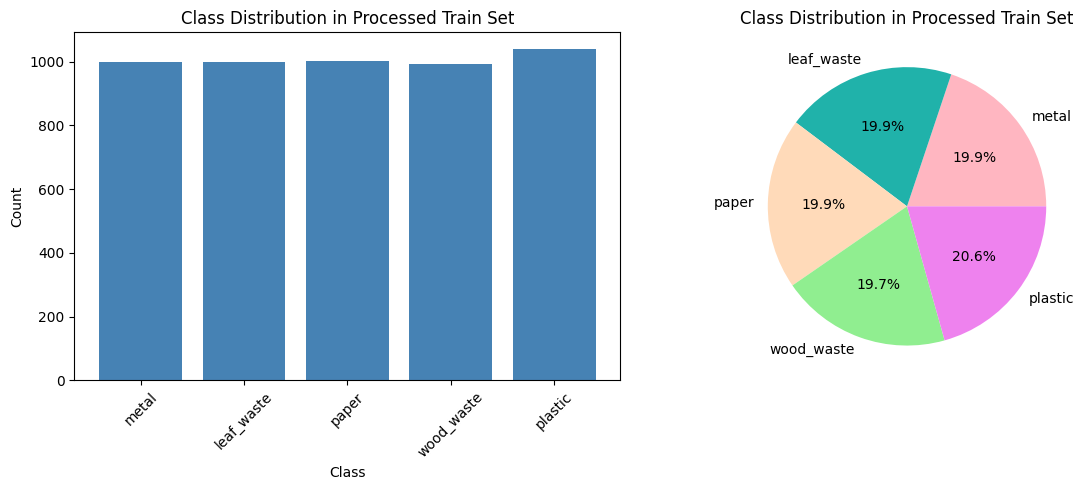

In [51]:
#forest_colors = ['orange', 'lightblue', 'saddlebrown', 'steelblue', 'peru', 'darkseagreen',]
#pastel_colors = ['mistyrose', 'lightsteelblue', 'palegreen', 'lightcoral', 'lavender', 'thistle']
spring_colors = ['lightpink', 'lightseagreen', 'peachpuff', 'lightgreen', 'violet', 'lightgoldenrodyellow']
#winter_colors = ['powderblue', 'lavender', 'lightgray', 'lightcyan', 'aliceblue', 'lightslategray']

# Create a figure with a grid of 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Create the bar chart and place it in the first subplot (axs[0])
axs[0].bar(class_distribution_df.index, class_distribution_df['Count'], color='steelblue')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].set_title('Class Distribution in Processed Train Set')
axs[0].tick_params(axis='x', rotation=45)

# Create the pie chart and place it in the second subplot (axs[1])
axs[1].pie(class_distribution_df['Count'], labels=class_distribution_df.index, autopct='%1.1f%%', colors=spring_colors)
axs[1].set_title('Class Distribution in Processed Train Set')

# Adjust the layout
plt.tight_layout()

# Display the combined plot
plt.show()

### Sample Images

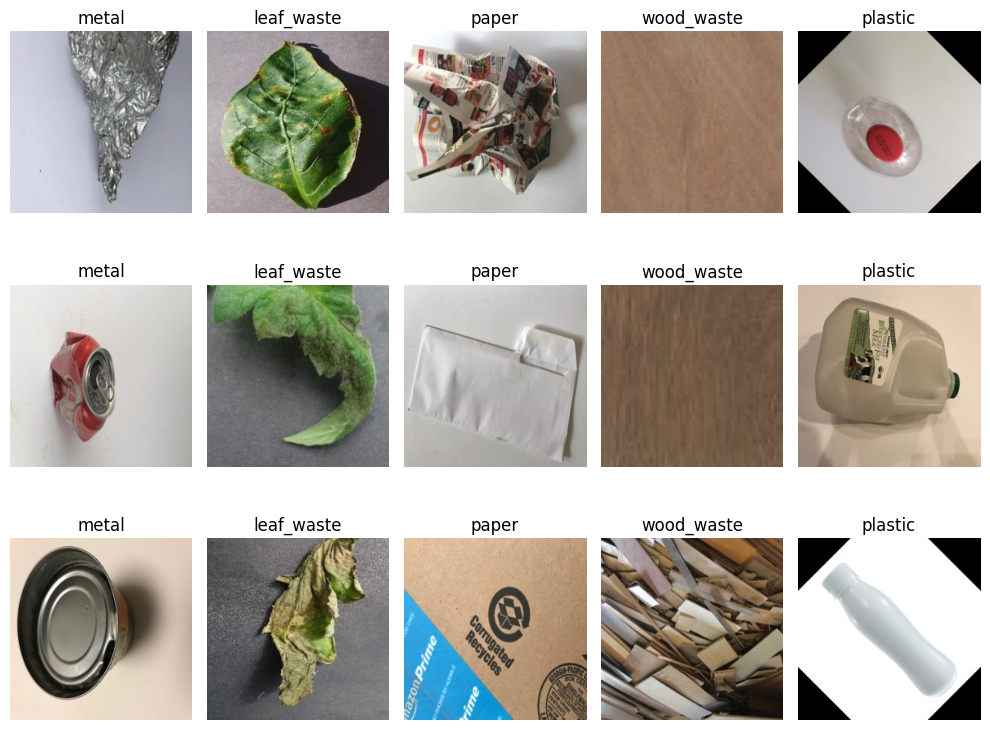

In [18]:
from matplotlib.image import imread
import random

# Directory containing subfolders for different classes
main_dir = '/kaggle/input/datascience-dataset/processed/train'
class_names = os.listdir(main_dir)

# Create a subplot with 3 rows and len(class_names) columns
num_rows = 3
num_cols = len(class_names)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

for col, class_name in enumerate(class_names):
    class_dir = os.path.join(main_dir, class_name)
    image_files = os.listdir(class_dir)
    # Randomly select 3 images from each class
    selected_images = random.sample(image_files, 3)
    
    for row, image_file in enumerate(selected_images):
        img_path = os.path.join(class_dir, image_file)
        img = imread(img_path)
        axs[row, col].imshow(img)
        axs[row, col].set_title(class_name)
        axs[row, col].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Image Thumbnails

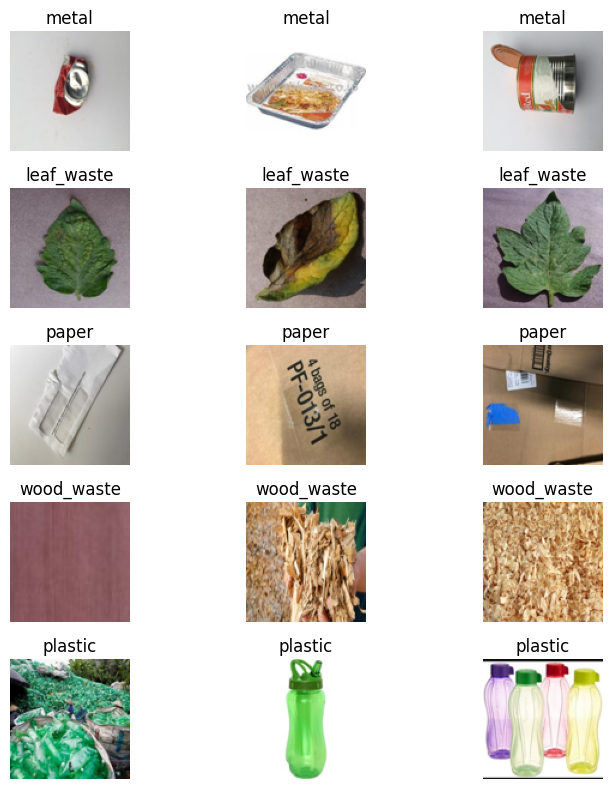

In [22]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing subfolders for different classes
main_dir = '/kaggle/input/datascience-dataset/processed/train'

# List of subfolders (class names)
class_names = os.listdir(main_dir)

# Create a subplot to display the thumbnail images
num_rows = len(class_names)
num_cols = 3  # Number of images per class
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 8))

for row, class_name in enumerate(class_names):
    class_dir = os.path.join(main_dir, class_name)
    image_files = os.listdir(class_dir)
    
    for col in range(num_cols):
        # Randomly select an image from each class
        random_image = random.choice(image_files)
        img_path = os.path.join(class_dir, random_image)
        img = Image.open(img_path)
        
        # Resize the image to a thumbnail size
        img.thumbnail((100, 100))
        
        # Display the thumbnail image
        axs[row, col].imshow(img)
        axs[row, col].set_title(class_name)
        axs[row, col].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the original image
def plot_original_image(image, position):
    plt.subplot(*position)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Function to plot the Histogram of Pixel Values as a bar chart
def plot_histogram(image, position):
    plt.subplot(*position)
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.title('Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.hist(image.ravel(), 256, [0, 256])
    plt.xlim([0, 256])

# Function to separate and visualize individual color channels
def separate_color_channels(image, position):
    # Split the image into individual color channels
    b, g, r = cv2.split(image)

    # Create empty images for each channel
    zeros = np.zeros_like(b)

    # Merge the channels back to create color images
    blue_img = cv2.merge([b, zeros, zeros])
    green_img = cv2.merge([zeros, g, zeros])
    red_img = cv2.merge([zeros, zeros, r])

    # Display the color channel images
    plt.subplot(*position)

    plt.title('Red Channel')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))

    plt.subplot(position[0], position[1], position[2] + 1)

    plt.title('Green Channel')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))

    plt.subplot(position[0], position[1], position[2] + 2)

    plt.title('Blue Channel')
    plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Function to generate a heatmap
def generate_heatmap(image, position):
    plt.subplot(*position)
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply a colormap to create a heatmap
    heatmap = cv2.applyColorMap(image, cv2.COLORMAP_JET)
    # Display the heatmap
    plt.title('Heatmap')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB))



# Histograms of Pixel Values

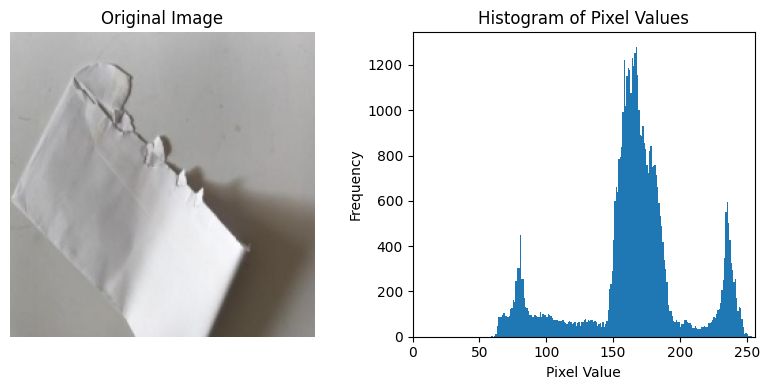

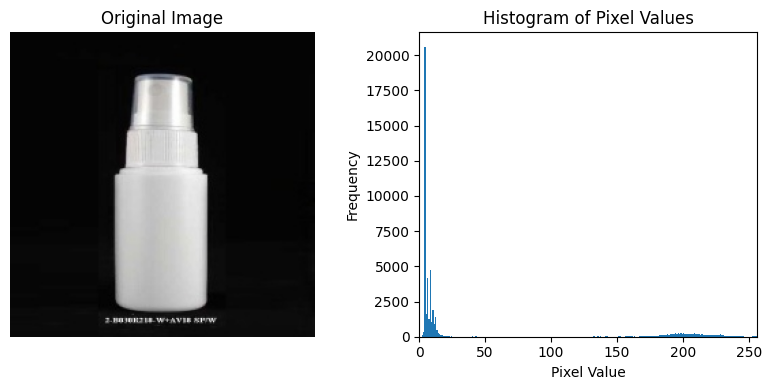

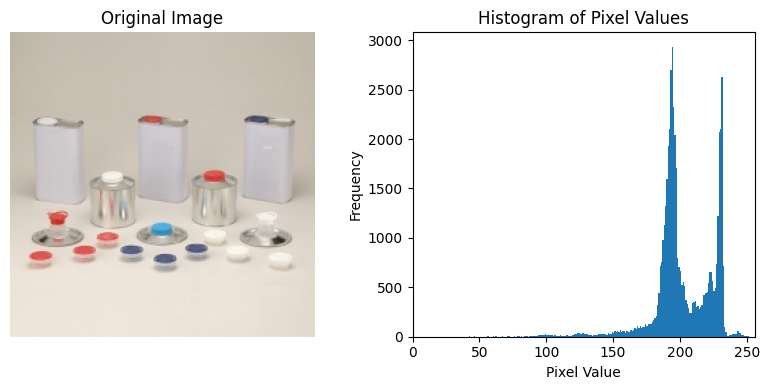

In [ ]:
# Load multiple images (you can extend this list)
image_paths = ['/kaggle/input/datascience-dataset/processed/train/paper/train_paper_10.jpg',
               '/kaggle/input/datascience-dataset/processed/train/plastic/train_plastic_102.jpg',
               '/kaggle/input/datascience-dataset/processed/train/metal/train_metal_103.jpg']

for i in image_paths:
    image = cv2.imread(i)
    plt.figure(figsize=(8, 4))
    # Plot the original image
    plot_original_image(image, (1, 2, 1))

    # Plot the histogram
    plot_histogram(image, (1, 2, 2))
    plt.tight_layout()
    plt.show()
    



# RGB Channels

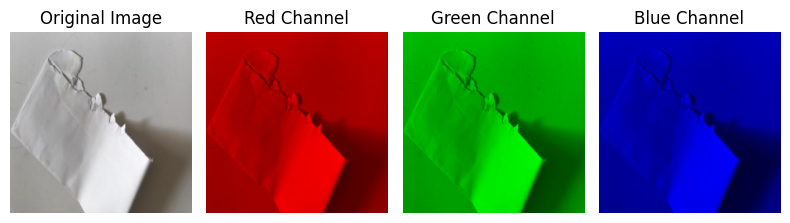

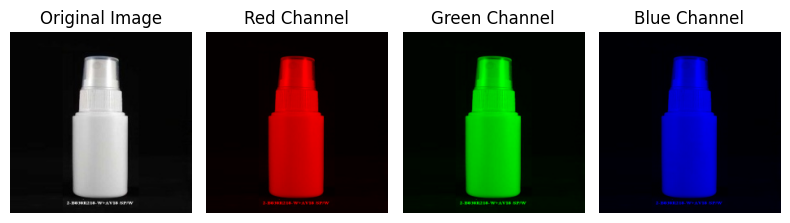

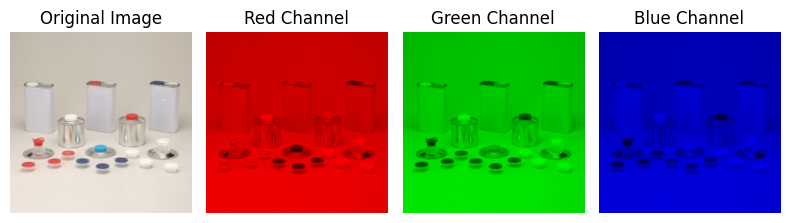

In [ ]:
for i in image_paths:
    image = cv2.imread(i)
    # Plot the original image
    plt.figure(figsize=(8, 4))
    plot_original_image(image, (1, 4, 1))
    
    ## Separate and visualize color channels
    separate_color_channels(image, (1, 4, 2))

    plt.tight_layout()
    plt.show()
    

# Heatmaps

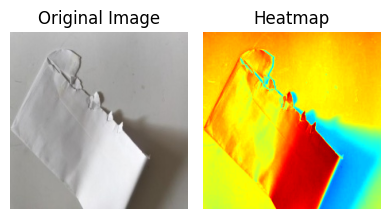

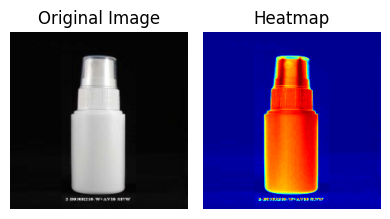

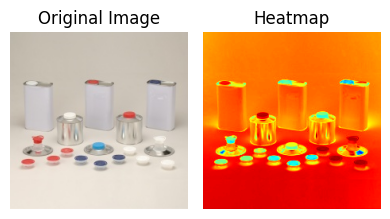

In [ ]:
for i in image_paths:
    image = cv2.imread(i)
    # Plot the original image
    plt.figure(figsize=(4, 4))
    plot_original_image(image, (1, 2, 1))
    
    ## Separate and visualize color channels
    generate_heatmap(image, (1, 2, 2))

    plt.tight_layout()
    plt.show()
    

# Augmentations

In [ ]:
def augment(img):
  return rotate_image(img,45), horizontal_flip(img), vertical_flip(img)

def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def horizontal_flip(image):
    flipped_image = cv2.flip(image, 1)
    return flipped_image

def vertical_flip(image):
    flipped_image = cv2.flip(image, 0)
    return flipped_image

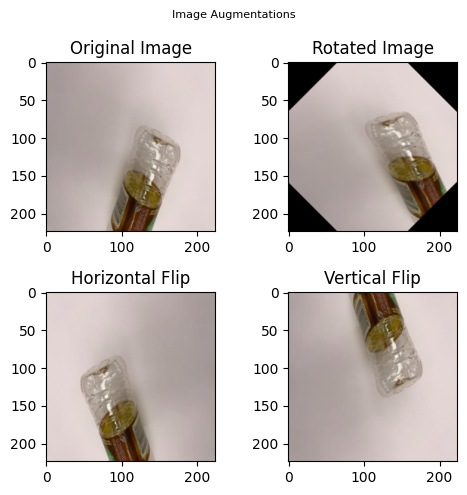

In [ ]:
# Read the image in RGB format
image = cv2.imread('/kaggle/input/datascience-dataset/processed/train/plastic/train_plastic_114_2.jpg', cv2.COLOR_BGR2RGB)
im1, im2, im3 = augment(image)
# Create subplots with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
fig.suptitle("Image Augmentations", fontsize=8)

# Plot the original image with a title
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")

# Plot the augmented images with titles
axs[0, 1].imshow(im1)
axs[0, 1].set_title("Rotated Image")

axs[1, 0].imshow(im2)
axs[1, 0].set_title("Horizontal Flip")

axs[1, 1].imshow(im3)
axs[1, 1].set_title("Vertical Flip")

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()
